In [683]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]

In [684]:
# defining function for diffusion in 3D over time
def calculate_diffusion(total_time, delta_T):
    
    # defining variables
    k_B = 1.38 * pow(10,-23); 
    temperature = 298; 
    mu = 1 * pow(10,-3); 
    a = 1 * pow(10,-6); 
    gamma = 6 * math.pi * mu * a; 
    D_t = (k_B * temperature) / (gamma); 

    temp_X, temp_Y, temp_Z, delta_X, delta_Y, delta_Z = 0, 0, 0, 0, 0, 0; 
    start_X, start_Y, start_Z = 0, 0, 0; 

    # starting point defined as (start_X, start_Y, start_Z)
    X = np.array([start_X]); 
    Y = np.array([start_Y]); 
    Z = np.array([start_Z]); 

    # defining starting position of the particle
    temp_X = start_X; 
    temp_Y = start_Y; 
    temp_Z = start_Z;  

    for time in np.arange(0, total_time - delta_T, delta_T): 

        # randomly sampling noise in Gaussian distrib. with mean 0 and variance 1
        W_X = np.random.normal(0, 1); 
        W_Y = np.random.normal(0, 1); 
        W_Z = np.random.normal(0, 1);              

        # solving change in position for each dimension
        delta_X = np.sqrt(2 * D_t * delta_T) * W_X; 
        delta_Y = np.sqrt(2 * D_t * delta_T) * W_Y; 
        delta_Z = np.sqrt(2 * D_t * delta_T) * W_Z; 

        # using a temporary variable to track position
        temp_X += delta_X; 
        temp_Y += delta_Y; 
        temp_Z += delta_Z; 

        # appending new position to arrays storing position over time
        X = np.append(X, [temp_X]); 
        Y = np.append(Y, [temp_Y]); 
        Z = np.append(Z, [temp_Z]); 
    
    return X, Y, Z, D_t; # returning coordinates and diffusion coefficient (for comparison later)

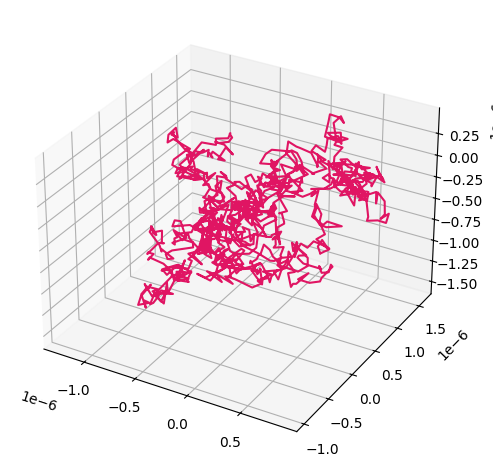

In [685]:
# defining variables to pass into our function
total_time = 10; 
delta_T = 0.01; 

# storing objects returned by function
X, Y, Z, D_t = calculate_diffusion(total_time, delta_T); 

# 3D graphing definitions 
ax = plt.axes(projection='3d'); 
plt.tight_layout(); 

ax.plot3D(X, Y, Z, color_list[2]); # graphing line using color in colorlist (defined in the includes)

Observed : 3.2204835379085786e-13 vs. expected : 2.181695959903701e-13


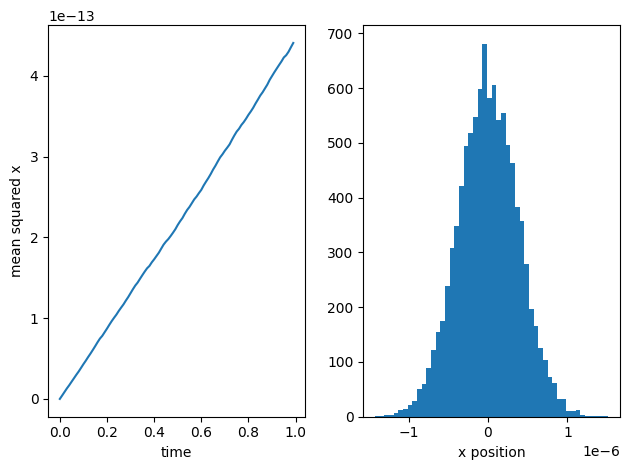

In [686]:
# defining parameters for function and the number of times we want to run it
trials = 10000; 
total_time = 1; 
delta_T = 0.01; 

all_X = []; # an array we'll used to store all X values between trials
displacement = []; # an array we'll use to define displacement from origin

# running function <trials> times in order to gather average displacement values across random trials
for N in range(0, trials, 1):
    X, Y, Z, D_t = calculate_diffusion(total_time, delta_T); 

    if N == 0: # necessary to match all_X dimensions in subsequent N
        all_X = X; 
    else:
        all_X = np.vstack((all_X, X)); # adding new vectors (X) to rows of all_X
    
    # for each trial, solving displacement from origin and appending to displacement array
    temp_displacement = np.sqrt(pow(X[-1], 2) + pow(Y[-1], 2) + pow(Z[-1], 2)); 
    displacement = np.append(displacement, [temp_displacement]); 

mean_squared_displacement = np.mean(pow(displacement, 2)); # squaring and averaging displacement into new array

D_eff = mean_squared_displacement / (4 * total_time); # calculating effective diffusion coefficient, D_eff, from mean squared displacement
print("Observed :", D_eff, "vs. expected :", D_t) # printing comparison of D_t and D_eff

mean_X = []; # note: this represents mean x per trial
for row in range(len(all_X)): # goal is to see distribution of X values
    mean_X = np.append(mean_X, [np.mean(all_X[row,:])]); # determining mean X for each trial

all_X = pow(all_X, 2); 
mean_squared_X = []; # note: this representents mean squared x per timepoint
for col in range(len(all_X[0])): # goal is to see mean squared X over time
    mean_squared_X = np.append(mean_squared_X, [np.mean(all_X[:,col])]); # determining mean X for each time point

plt.subplot(1, 2, 1); # putting plots on the same image, this at row 1, col 1, index 1
time = np.arange(0, total_time, delta_T); # generating X axis for plot
plt.plot(time, mean_squared_X); 
plt.xlabel('time'); 
plt.ylabel('mean squared x'); 

plt.subplot(1, 2, 2); # putting plots on the same image, this at row 1, col 2, index 1
plt.hist(mean_X, 50); # creating histogram with 50 buckets
plt.xlabel('x position'); 

plt.tight_layout(); 
plt.show(); 